In [2]:
!pip install "unstructured[all-docs]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 22.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.1/526.1 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!sudo apt-get update
!sudo apt-get install poppler-utils
!sudo apt-get install tesseract-ocr
!sudo apt-get install libtesseract-dev

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,381 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,684 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,538 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadcontent.

In [4]:
!pip install unstructured-pytesseract
!pip install pillow
!pip install lxml
!pip install pdf2image
!pip install pdfminer.six
!pip install matplotlib

In [2]:
import os
os.listdir(".")

['.config', 'RAG-For-NLP.pdf', 'sample_data']

In [3]:
from unstructured.partition.pdf import partition_pdf
raw_pdf_elements=partition_pdf(
    filename="/content/RAG-For-NLP.pdf",
    strategy="hi_res",
    extract_images_in_pdf=True,
    extract_image_block_types=["Image","Table"],
    extract_image_block_to_payload=False,
    extract_image_block_output_dir="extracted_data"
    )

In [4]:
raw_pdf_elements

In [5]:
Header=[]
Footer=[]
Title=[]
NarrativeText=[]
Text=[]
ListItem=[]
Image=[]
Table=[]
for element in raw_pdf_elements:
  if "unstructured.documents.elements.Header" in str(type(element)):
            Header.append(str(element))
  elif "unstructured.documents.elements.Footer" in str(type(element)):
            Footer.append(str(element))
  elif "unstructured.documents.elements.Title" in str(type(element)):
            Title.append(str(element))
  elif "unstructured.documents.elements.NarrativeText" in str(type(element)):
            NarrativeText.append(str(element))
  elif "unstructured.documents.elements.Text" in str(type(element)):
            Text.append(str(element))
  elif "unstructured.documents.elements.ListItem" in str(type(element)):
            ListItem.append(str(element))
  elif "unstructured.documents.elements.Image" in str(type(element)):
            Image.append(str(element))
  elif "unstructured.documents.elements.Table" in str(type(element)):
            Table.append(str(element))

In [6]:
Table

['Closed Book T5-11B [52] 34.5 T5-11B+SSM[52] 36.6 - - /50.1 37.4 /60.5 44.7 - - Model B-1 QB-1 R-L B-1 Label Acc. Open REALM [20] 40.4 - / - 40.7 46.8 SotA - - 49.8* 49.9* 76.8 Book DPR [26] 41.5 57.9/ - 41.1 50.6 BART 15.1 19.7 38.2 41.6 64.0 81.1 RAG-Token RAG-Seq. 44.1 55.2/66.1 45.5 50.0 44.5 56.8/68.0 45.2 52.2 RAG-Tok. 17.3 22.2 RAG-Seq. 14.7 21.4 40.1 40.8 41.5 44.2 72.5 89.5',
 'Task Input Model Generation MS- deﬁne middle ear BART ?The middle ear is the part of the ear between the middle ear and the nose. RAG-T The middle ear is the portion of the ear internal to the eardrum. RAG-S The middle ear includes the tympanic cavity and the three ossicles. MARCO what currency BART The currency needed in Scotland is Pound sterling. needed in RAG-T Pound is the currency needed in Scotland. scotland RAG-S The currency needed in Scotland is the pound sterling. BART ?This state has the largest number of counties in the U.S. Jeopardy Washington RAG-T It’s the only U.S. state named for a U.

In [7]:
Image

['@--- ee ee ee ee ee ee ee ee ee ee eee The middle ear includes End-to-End Backprop through q and pe the tympanic cavity and the three ossicles. (y) Define "middle ear" (x) Question Answering: Question Query Retriever py Document Generator pg “fnower Generation Index. (Non-Parametric) (Parametric) d(z) supports (y) Barack Obama was born in Hawaii. (x) q(x) Fact Verification: Fact Query Fact Verification: Label Generation The Divine This 14th century work Comedy (x) is divided into 3 Jeopardy Question Generation: Answer Query sections: "Inferno", "purgatorio" & "Paradiso" @) Question Generation',
 '| | | |',
 'Bee TT % 80 Porm Sa SRS nana ga g / Z fr = 70 2 | / 3 RAG TORRE 2 nf |! g <= RAG-Tok B-1 Ba Ze H=- RAGSeq RL a ; 3 Zs == RAG-Seq BA Q 50 > 50 ZO — reactor | & 3 soft === RAGSeq | Z 40 2 4s rr rr rr nr) rr nr K Retrieved Docs K Retrieved Docs K Retrieved Docs',
 'View full instructions Which sentence is more factually true? View tool guide Select an option Subject : Hemingway eI N

In [8]:
Title

['v',
 'arXiv',
 'i',
 'X',
 'r',
 'a',
 'Retrieval-Augmented Generation for Knowledge-Intensive NLP Tasks',
 'Abstract',
 '1 Introduction',
 '2 Methods',
 '2.1 Models',
 'N',
 '2.2 Retriever: DPR',
 'py(z|x) x exp(d(z)"q(x))',
 '2.3 Generator: BART',
 '2.4 Training',
 '2.5 Decoding',
 '3 Experiments',
 '3.1 Open-domain Question Answering',
 '3.2 Abstractive Question Answering',
 'Jeopardy Question Generation',
 '3.4 Fact Veriﬁcation',
 '4 Results',
 '4.1 Open-domain Question Answering',
 'Model',
 'NQ',
 'TQA WQ CT',
 'Jeopardy MSMARCO FVR3 FVR2',
 '4.2 Abstractive Question Answering',
 'Jeopardy Question Generation',
 '4.4 Fact Veriﬁcation',
 'Doc 1 poe 2',
 'Doc 3',
 '4.5 Additional Results',
 'Table 5: Ratio of distinct to total tri-grams for',
 'generation tasks.',
 'FVR-2',
 'Label Accuracy',
 '5 Related Work',
 '6 Discussion',
 'Broader Impact',
 'Acknowledgments',
 'References',
 'Appendices for Retrieval-Augmented Generation for Knowledge-Intensive NLP Tasks',
 'A Implementati

In [12]:
NarrativeText[1]

'Aleksandra Piktus†, Fabio Petroni†, Vladimir Karpukhin†, Naman Goyal†, Heinrich Küttler†,'

In [13]:
!pip install langchain_google_genai

In [62]:
from langchain_google_genai import (
    ChatGoogleGenerativeAI,GoogleGenerativeAIEmbeddings)

In [15]:
from google.colab import userdata
import os

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
os.environ["GOOGLE_API_KEY"]=GOOGLE_API_KEY

In [16]:
def load_model(model_name):
    if model_name == "gemini-pro":
        return ChatGoogleGenerativeAI(model="gemini-1.5-pro")
    elif model_name == "gemini-1.5-flash":
        return ChatGoogleGenerativeAI(model="gemini-1.5-flash")
    elif model_name == "embedding":
        return GoogleGenerativeAIEmbeddings(model="models/embedding-001")
    else:
        raise ValueError(f"Unsupported model name: {model_name}")

In [17]:
model_text=load_model("gemini-pro")

In [18]:
model_text

ChatGoogleGenerativeAI(model='models/gemini-1.5-pro', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7d9521a1a090>, default_metadata=())

In [19]:
model_text.invoke("hi")

AIMessage(content='Hi there! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-pro-002', 'safety_ratings': []}, id='run-564b3308-e947-4f36-a57e-d48d437b84b8-0', usage_metadata={'input_tokens': 1, 'output_tokens': 11, 'total_tokens': 12, 'input_token_details': {'cache_read': 0}})

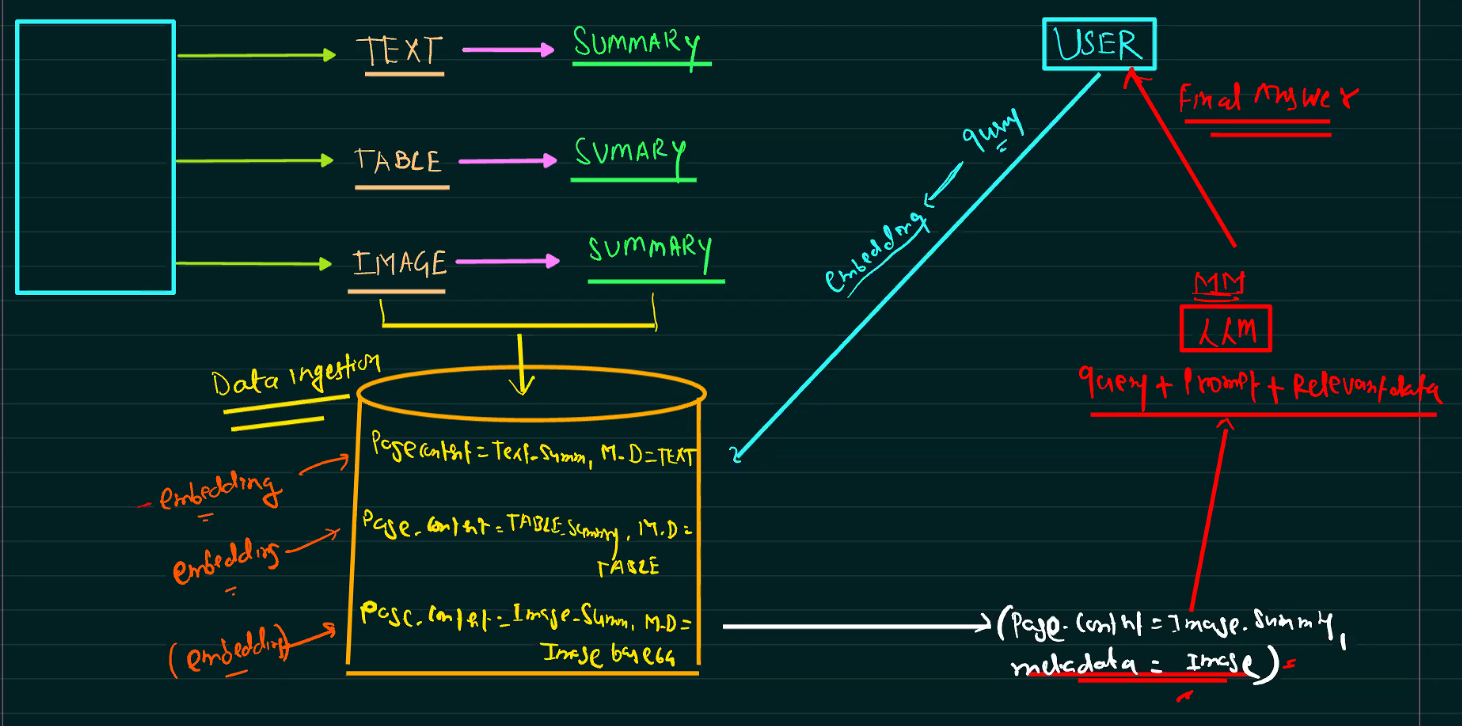

## Prepare the Data for Vector Database

In [20]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

### Create Summary for Narrative Text

In [21]:
prompt_template="""You are an assistant tasked with summarizing text for retrieval. \
    These summaries will be embedded and used to retrieve the raw text elements. \
    Give a concise summary of the table or text that is well optimized for retrieval.text: {element} """

In [22]:
prompt = ChatPromptTemplate.from_template(prompt_template)

In [23]:
model = load_model("gemini-1.5-flash")

In [32]:
summarize_chain = {"element": lambda x: x }| prompt | model | StrOutputParser()

In [33]:
type(NarrativeText)

list

In [26]:
len(NarrativeText)

79

In [39]:
text = NarrativeText[:10]

In [34]:
text_summary=[]

In [40]:
text_summary=summarize_chain.batch(text,{"max_concurrency": 5})

In [36]:
# pip install langchain-groq
#from langchain_groq import ChatGroq


In [43]:
text_summary[6]

'Pre-trained language models implicitly learn knowledge but lack memory revision, explainability, and are prone to hallucinations.  Hybrid models combining parametric and non-parametric memory (e.g., REALM, ORQA) address these limitations by enabling knowledge expansion, revision, and inspection.'

In [46]:
import re
clean_text = re.sub(r"<think>.*?</think>\s*", "", text_summary[6], flags=re.DOTALL)

In [47]:
clean_text

'Pre-trained language models implicitly learn knowledge but lack memory revision, explainability, and are prone to hallucinations.  Hybrid models combining parametric and non-parametric memory (e.g., REALM, ORQA) address these limitations by enabling knowledge expansion, revision, and inspection.'

### Creating Summary of table

In [48]:
prompt_text = """You are an AI Assistant tasked with summarizing tables for retrieval. \
    These summaries will be embedded and used to retrieve the raw table elements. \
    Give a concise summary of the table that is well optimized for retrieval. Table:{element} """

In [49]:
prompt = ChatPromptTemplate.from_template(prompt_text)

In [50]:
table_summaries =[]


In [51]:
table_summaries = summarize_chain.batch(Table,{"max_concurrency": 5},)

In [53]:
len(table_summaries)

5

In [55]:
table_summaries[0]

'Benchmark results: Closed-book T5 models (34.5-37.4), Open-book REALM (40.4-49.9), DPR (41.1-57.9), and RAG (40.1-68.0) achieve varying label accuracy (B-1, QB-1, R-L) across different datasets.  Higher scores indicate better performance.'

### Creating Summary for Images

In [57]:
import base64
import os
from langchain_core.messages import AIMessage, HumanMessage

In [58]:
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

In [59]:
image_model = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

In [60]:
image_model.invoke("hi")

AIMessage(content='Hi there! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-flash', 'safety_ratings': []}, id='run-1dda163a-10c5-4fdd-b4a2-5b9316d12cdb-0', usage_metadata={'input_tokens': 1, 'output_tokens': 11, 'total_tokens': 12, 'input_token_details': {'cache_read': 0}})

In [76]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage

def image_summarize_v1(img_base64,prompt):
    chat = ChatGoogleGenerativeAI(model="gemini-1.5-flash")
    msg = chat.invoke(
        [
            HumanMessage(
                content=[
                    {
                    "type": "text",
                     "text": prompt
                     }
                    ,
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{img_base64}"},
                    },
                ]
            )
        ]
    )
    return msg.content

In [77]:
import os

def generate_img_summaries(path):
    """
    Generate summaries and base64 encoded strings for images.

    Args:
        path (str): Path to the directory containing .jpg files extracted by Unstructured.

    Returns:
        tuple: Two lists:
            - img_base64_list: A list of base64-encoded image strings.
            - image_summaries: A list of concise summaries for each image.
    """

    # List to store the base64 encoded strings of the images
    img_base64_list = []

    # List to store the summaries of each image
    image_summaries = []

    # Define a prompt for image summarization
    prompt = """You are an assistant tasked with summarizing images for retrieval. \
    These summaries will be embedded and used to retrieve the raw image. \
    Give a concise summary of the image that is well optimized for retrieval."""

    # Loop over each file in the directory specified by 'path'
    for img_file in sorted(os.listdir(path)):
        # Check if the file has a .jpg extension
        if img_file.endswith(".jpg"):
            # Construct the full path to the image file
            img_path = os.path.join(path, img_file)

            # Encode the image to a base64 string
            base64_image = encode_image(img_path)

            # Append the base64-encoded image to the list
            img_base64_list.append(base64_image)

            # Generate a summary for the image using the base64 string and the prompt
            summary = image_summarize_v1(base64_image, prompt)

            # Append the generated summary to the list
            image_summaries.append(summary)

    # Return the two lists: base64-encoded images and their corresponding summaries
    return img_base64_list, image_summaries


In [78]:
fpath="/content/extracted_data/"
img_base64_list, image_summaries=generate_img_summaries(fpath)

In [79]:
len(img_base64_list)

9

In [81]:
image_summaries[0]

'Hemingway authorship quiz:  "The Sun Also Rises" and birthplace (Havana, Cuba).  Multiple choice question.'

## Will store the data inside VDB and will Create a retriever

In [84]:
# pip install -U langchain-community

In [85]:
import uuid
from langchain_core.documents import Document
from langchain.vectorstores import Chroma
from langchain.storage import InMemoryStore
from langchain.retrievers.multi_vector import MultiVectorRetriever

In [86]:
def create_multi_vector_retriever(vectorstore, text_summaries, texts, table_summaries, tables, image_smmaries, images):
    """
    Creates a Multi-Vector Retriever that stores and retrieves documents of different types
    (text, tables, and images) based on vector similarity.

    Args:
        vectorstore: The vector store used to store vector embeddings.
        text_summaries (list): List of text summaries for text documents.
        texts (list): List of raw text data corresponding to the text summaries.
        table_summaries (list): List of summaries for table documents.
        tables (list): List of raw table data corresponding to the table summaries.
        image_summaries (list): List of summaries for image documents.
        images (list): List of raw image data corresponding to the image summaries.

    Returns:
        retriever: The Multi-Vector Retriever object that stores and retrieves documents.
    """

    # Initialize an in-memory store for storing documents and their associated metadata
    store = InMemoryStore()

    # Define the key for identifying documents in the document store
    id_key = "doc_id"

    # Initialize the MultiVectorRetriever with the vector store and the in-memory document store
    retriever = MultiVectorRetriever(
        vectorstore=vectorstore,  # Vector store that holds vector embeddings
        docstore=store,           # Document store that holds raw documents and metadata
        id_key=id_key            # Key used to uniquely identify documents in the store
    )

    # Helper function to add documents to the retriever
    def add_documents(retriever, doc_summaries, doc_contents):
        """
        Adds documents and their summaries to the retriever.

        Args:
            retriever: The Multi-Vector Retriever object.
            doc_summaries (list): List of summaries for the documents.
            doc_contents (list): List of raw content for the documents.
        """
        # Generate unique document IDs using UUID
        doc_ids = [str(uuid.uuid4()) for _ in doc_contents]

        # Create a list of Document objects using the summaries and corresponding IDs
        summary_docs = [
            Document(page_content=summary, metadata={id_key: doc_ids[i]})
            for i, summary in enumerate(doc_summaries)
        ]

        # Add the summary documents to the vector store
        retriever.vectorstore.add_documents(summary_docs)

        # Add the raw document contents to the document store with corresponding IDs
        retriever.docstore.mset(list(zip(doc_ids, doc_contents)))

    # Add documents to the retriever for each type of document (text, table, image)
    if text_summaries:  # Check if text summaries are provided
        add_documents(retriever, text_summaries, texts)

    if table_summaries:  # Check if table summaries are provided
        add_documents(retriever, table_summaries, tables)

    if image_summaries:  # Check if image summaries are provided
        add_documents(retriever, image_summaries, images)

    # Return the retriever with all the added documents and vector embeddings
    return retriever


In [87]:
embedding_model=load_model("embedding")

In [90]:
# pip install chromadb

In [91]:
vectorstore=Chroma(collection_name="MMRAG",embedding_function=embedding_model)

In [92]:
retriever_multi_vector_img = create_multi_vector_retriever(
    vectorstore,
    text_summary,
    NarrativeText,
    table_summaries,
    Table,
    image_summaries,
    img_base64_list,
)

In [93]:
retriever_multi_vector_img

MultiVectorRetriever(vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x7d9512e6c950>, docstore=<langchain_core.stores.InMemoryStore object at 0x7d9510beded0>, search_kwargs={})

In [95]:
query = "Why We combine a pre-trained retriever (Query Encoder + Document Index) with a pre-trained seq2seq model (Generator) and fine-tune end-to-end?"

In [97]:
retriever_multi_vector_img.invoke(query)

['Figure 1: Overview of our approach. We combine a pre-trained retriever (Query Encoder + Document Index) with a pre-trained seq2seq model (Generator) and ﬁne-tune end-to-end. For query x, we use Maximum Inner Product Search (MIPS) to ﬁnd the top-K documents zi. For ﬁnal prediction y, we treat z as a latent variable and marginalize over seq2seq predictions given different documents.',
 'We endow pre-trained, parametric-memory generation models with a non-parametric memory through a general-purpose ﬁne-tuning approach which we refer to as retrieval-augmented generation (RAG). We build RAG models where the parametric memory is a pre-trained seq2seq transformer, and the non-parametric memory is a dense vector index of Wikipedia, accessed with a pre-trained neural retriever. We combine these components in a probabilistic model trained end-to-end (Fig. 1). The retriever (Dense Passage Retriever [26], henceforth DPR) provides latent documents conditioned on the input, and the seq2seq model (

## below code for the image data processing

In [98]:
import io
import re
from IPython.display import HTML, display
from PIL import Image

In [99]:
def is_image_data(b64data):
    image_signatures = {
        b"\xFF\xD8\xFF": "jpg",
        b"\x89\x50\x4E\x47\x0D\x0A\x1A\x0A": "png",
        b"\x47\x49\x46\x38": "gif",
        b"\x52\x49\x46\x46": "webp",
    }
    try:
        header = base64.b64decode(b64data)[:8]  # Decode and get the first 8 bytes
        for sig, format in image_signatures.items():
            if header.startswith(sig):
                return True
        return False
    except Exception:
        return False

In [100]:
def looks_like_base64(sb):
  return re.match("^[A-Za-z0-9+/]+[=]{0,2}$", sb) is not None

In [101]:
def resize_base64_image(base64_string,size=(128,128)):
  # Decode the Base64 string
    img_data = base64.b64decode(base64_string)
    img = Image.open(io.BytesIO(img_data))

    # Resize the image
    resized_img = img.resize(size, Image.LANCZOS)

    # Save the resized image to a bytes buffer
    buffered = io.BytesIO()
    resized_img.save(buffered, format=img.format)

    # Encode the resized image to Base64
    return base64.b64encode(buffered.getvalue()).decode("utf-8")

In [102]:
def split_image_text_types(docs):
    """
    Split base64-encoded images and texts
    """
    b64_images = []
    texts = []

    for doc in docs:
        # Check if the document is of type Document and extract page_content if so
        if isinstance(doc, Document):
            doc = doc.page_content
        if looks_like_base64(doc) and is_image_data(doc):
            doc = resize_base64_image(doc, size=(1300, 600))
            b64_images.append(doc)
        else:
            texts.append(doc)

    return {"images": b64_images, "texts": texts}

In [103]:
def img_prompt_func(data_dict):
  """
  Join the context into a single string
  """
  print(data_dict)
  formatted_texts = "\n".join(data_dict["context"]["texts"])
  messages = []

  # Adding image(s) to the messages if present
  if data_dict["context"]["images"]:
      for image in data_dict["context"]["images"]:
          image_message = {
              "type": "image_url",
              "image_url": {"url": f"data:image/jpeg;base64,{image}"},
          }
          messages.append(image_message)

  # Adding the text for analysis
  text_message = {
      "type": "text",
      "text": (
          "You are a helpful assistant.\n"
          "You will be given a mixed info(s) .\n"
          "Use this information to provide relevant information to the user question. \n"
          f"User-provided question: {data_dict['question']}\n\n"
          "Text and / or tables:\n"
          f"{formatted_texts}"
      ),
  }
  messages.append(text_message)
  return [HumanMessage(content=messages)]

## after that will perform the generation operation using chaining

In [104]:
from langchain_core.runnables import RunnablePassthrough, RunnableLambda

In [105]:
def multi_modal_rag_chain(retriever):
  chain=(
      {"context":retriever | RunnableLambda(split_image_text_types),
       "question": RunnablePassthrough()
      }
      | RunnableLambda(img_prompt_func)

      |model
      |StrOutputParser()
  )

  return chain

In [106]:
chain_multimodal_rag = multi_modal_rag_chain(retriever_multi_vector_img)

In [107]:
query1="Explain any images / figures in the paper with Left: NQ performance as more documents are retrieved. Center: Retrieval recall performance\
in NQ. Right: MS-MARCO Bleu-1 and Rouge-L as more documents are retrieved."

In [108]:
chain_multimodal_rag.invoke(query1)

{'context': {'images': ['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAJYBRQDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKCcAmiigCL5lXAQ4B6eop4JwPlIrxbSbP4q+IdKt9Ws/EdrDBc7mSNl5VdxA/kKvf8Iz8Xv8Aoa7L/vj/AOtQB63k/wB00ZP9015J/wAIz8Xv+hrsv++P/rUf8Iz8Xv8Aoa7

'Here\'s an explanation of the provided figures, focusing on the aspects you\'ve highlighted:\n\n**Figure (Left): NQ Exact Match Performance**\n\nThis graph shows how the "Exact Match" accuracy on the Natural Questions (NQ) dataset changes as the number of retrieved documents (K) increases.  The x-axis represents the number of documents retrieved, and the y-axis represents the Exact Match accuracy.  Two models are compared:\n\n* **RAG-Tok:**  A model using a token-based retrieval approach.\n* **RAG-Seq:** A model using a sequence-based retrieval approach.\n\nThe graph indicates that both models improve their accuracy as more documents are considered, but RAG-Seq appears to achieve higher accuracy overall and plateaus at a slightly higher level than RAG-Tok.\n\n**Figure (Center): NQ Answer Recall@K**\n\nThis graph also focuses on the NQ dataset but measures "Answer Recall@K." This metric indicates the percentage of questions where the correct answer is present among the top K retrieved 

In [109]:
query = "Why We combine a pre-trained retriever (Query Encoder + Document Index) with a pre-trained seq2seq model (Generator) and fine-tune end-to-end?"

In [110]:
chain_multimodal_rag.invoke(query)

{'context': {'images': [], 'texts': ['Figure 1: Overview of our approach. We combine a pre-trained retriever (Query Encoder + Document Index) with a pre-trained seq2seq model (Generator) and ﬁne-tune end-to-end. For query x, we use Maximum Inner Product Search (MIPS) to ﬁnd the top-K documents zi. For ﬁnal prediction y, we treat z as a latent variable and marginalize over seq2seq predictions given different documents.', 'We endow pre-trained, parametric-memory generation models with a non-parametric memory through a general-purpose ﬁne-tuning approach which we refer to as retrieval-augmented generation (RAG). We build RAG models where the parametric memory is a pre-trained seq2seq transformer, and the non-parametric memory is a dense vector index of Wikipedia, accessed with a pre-trained neural retriever. We combine these components in a probabilistic model trained end-to-end (Fig. 1). The retriever (Dense Passage Retriever [26], henceforth DPR) provides latent documents conditioned on

"Combining a pre-trained retriever (Query Encoder + Document Index) with a pre-trained seq2seq model (Generator) and fine-tuning them end-to-end, as described in the provided text, offers several advantages:\n\n* **Combines Parametric and Non-Parametric Memory:**  Large language models (LLMs) store knowledge within their parameters (parametric memory), but accessing and manipulating this knowledge precisely remains challenging.  Adding a non-parametric memory (a document index accessed via a retriever) supplements the LLM's knowledge, allowing access to a broader and more readily updated knowledge base (like Wikipedia).\n\n* **Improved Knowledge Access and Manipulation:** The retriever allows the model to access specific, relevant information from the external knowledge base, addressing the limitations of relying solely on the LLM's internal knowledge. This leads to more accurate and factual outputs, especially on knowledge-intensive tasks.\n\n* **Enhanced Factual Accuracy and Diversit